## 1. Import Necessary Libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
newspaper_data=pd.read_csv('NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

### 3.1 Initial Understanding

In [3]:
newspaper_data.shape

(34, 3)

In [4]:
newspaper_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### 3.2 ASSUMPTIONS CHECK

#### 1. Normality Test

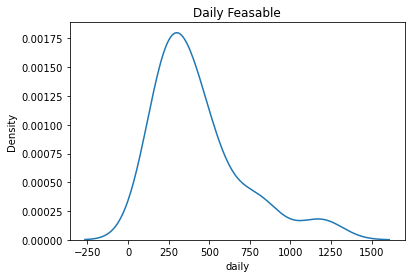

In [6]:
sns.distplot(a=newspaper_data['daily'], hist=False)
plt.title('Daily Feasable')
plt.show()

In [7]:
newspaper_data['daily'].skew()

1.5321591323040094

In [8]:
newspaper_data['daily'].kurtosis()

1.999034084097406

#### Normality test is Failed

#### 2. Linearity Test

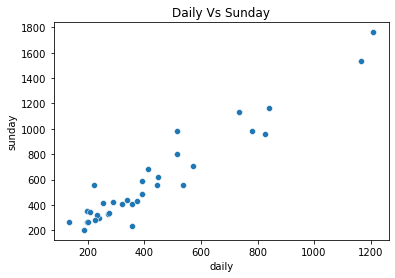

In [9]:
sns.scatterplot(x='daily' ,y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

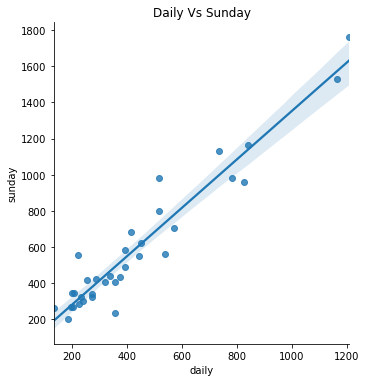

In [10]:
sns.lmplot(x='daily' ,y='sunday',data=newspaper_data) #Plot data and regression model fits across a FacetGrid
plt.title('Daily Vs Sunday')
plt.show() 

#### Linearity test also Failed

#### 3. Multicollinearity Test

We cannot perform here as we are having only one i/p feature

#### 4. AutoRegression Test

We cannot perform here as we are having only one i/p feature and that is not also not time based feature

#### 5. HomoscadasticityTest | 6. Zero Residual Mean Test

These 2 tests can be only performed post model training.

## 4. Data Preparation

In [11]:
del newspaper_data['Newspaper']

In [12]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [13]:
newspaper_data.isnull().sum()

daily     0
sunday    0
dtype: int64

In [14]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

#### NOTE:

Linear Regression can be performed by using 2 librarires:

**1. Statsmodels- OLS[ordinary Least Square]**

**2. sklearn- LinearRegression()**

## 5. Model Building | 6. Model training using Statsmodels

In [15]:
import statsmodels.formula.api as smf

In [16]:
linear_model=smf.ols(formula='sunday~daily', data=newspaper_data).fit()

In [17]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## 7. Model Testing

### Manual Testing

y=mx+c

If x=200, y=?
If x=350, y=?
If x=420, y=?

In [18]:
(1.339715*200)+ 13.835630

281.77862999999996

In [19]:
(1.339715*350)+ 13.835630

482.73587999999995

In [20]:
(1.339715*420)+ 13.835630

576.51593

### Machine Prediction

In [21]:
test_data=pd.DataFrame(data={'daily':[200,350,420]})
test_data

,daily
0,200
1,350
2,420


In [22]:
linear_model.predict(test_data)

0    281.778581
1    482.735795
2    576.515828
dtype: float64

## 8. Model Evaluation

**PARK**

## 9. Model Deployment

Serialization: To convert the python script into a binary file in such a way that machine could understand

In [23]:
from pickle import dump

In [24]:
dump(linear_model,open('model.pkl','wb')) #Write a pickled representation of obj to the open file object file.

In [25]:
from pickle import load

In [26]:
loaded_model=load(open('model.pkl','rb')) #Read and return an object from the pickle data stored in a file.

In [27]:
loaded_model.predict(test_data)

0    281.778581
1    482.735795
2    576.515828
dtype: float64

### The End